<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/17_timeseries_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TimeSeries data

In [1]:
import pandas as pd
df= pd.read_csv("all_stocks_5yr.csv")#, parse_dates=["date"]
df.dtypes



date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [2]:
df.date = pd.to_datetime(df.date)
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [3]:
df.head(2)
#the volume is  the number of stocks traded 

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL


In [4]:
df.describe()# looking for if there are a  minimum = zero or a negative price

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [5]:
df2 = df.set_index(["Name", "date"]).sort_index()
df2.head(3)

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731

In [6]:
df2.loc["AAL"].head(3)

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000


In [7]:
aal = df2.xs("AAL")#.head(3)

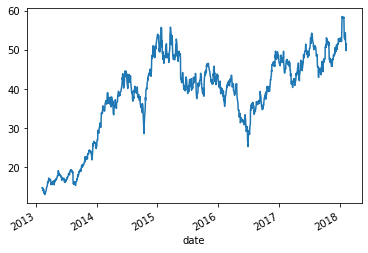

In [8]:
aal.close.plot();


In [11]:
idx = pd.IndexSlice
df_a = df2.loc[idx["A":"AB", :], :]
df_a.sample(3)

open    high     low   close    volume
Name date                                                
AAPL 2017-12-14  172.40  173.13  171.65  172.22  20476541
     2017-06-16  143.78  144.50  142.20  142.27  50361093
A    2014-10-28   54.12   54.67   53.88   54.66   1714329

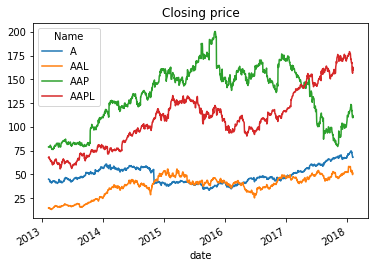

In [12]:
df_a.close.unstack(level="Name").plot(title="Closing price");

## Slicing datetimes

In [13]:
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [20]:
aal["2017"].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316


In [22]:
aal.loc["2017-01-03"]

open           47.280
high           47.340
low            46.135
close          46.300
volume    6737752.000
Name: 2017-01-03 00:00:00, dtype: float64

In [23]:
aal.loc["2017-01-3"]

open           47.280
high           47.340
low            46.135
close          46.300
volume    6737752.000
Name: 2017-01-03 00:00:00, dtype: float64

In [26]:
aal.xs("2017-01-3")

open           47.280
high           47.340
low            46.135
close          46.300
volume    6737752.000
Name: 2017-01-03 00:00:00, dtype: float64

In [37]:
aal[idx["2017":"2017-01-10"]]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
2017-01-10,47.00,48.510,46.970,48.48,7483764


In [36]:
df2.loc[idx[:,"2017":"2017-01-4"], : ]

,,open,high,low,close,volume
Name,date,,,,,
A,2017-01-03,45.93,46.7500,45.740,46.49,1739726
AAL,2017-01-03,47.28,47.3400,46.135,46.30,6737752
AAP,2017-01-03,170.78,171.3600,169.310,170.60,691526
AAPL,2017-01-03,115.80,116.3300,114.760,116.15,28781865
ABBV,2017-01-03,62.92,63.0300,61.935,62.41,9328198
...,...,...,...,...,...,...
XYL,2017-01-03,49.95,50.2500,49.210,49.65,1596877
YUM,2017-01-03,63.56,63.7899,62.820,63.21,4793381
ZBH,2017-01-03,103.87,103.9000,102.590,103.33,1381230


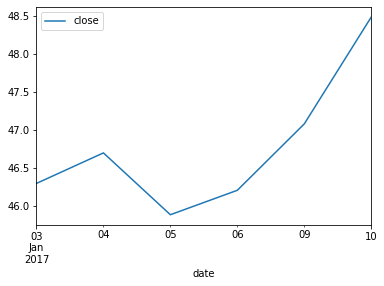

In [42]:
aal.loc[idx["2017":"2017-01-10"], "close":"close"].plot();

In [44]:
df2.to_pickle("stocks.pkl")

In [45]:
%ls


all_stocks_5yr.csv  sample_data/  stocks.pkl
